In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing dataset
dataset = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
# Shape of dataset
print('Rows: {} Columns: {}'.format(dataset.shape[0], dataset.shape[1]))

Rows: 5110 Columns: 12


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [3]:
# Menghapus kolom 'id' dari dataset
dataset.drop(columns=['id'], inplace=True)

In [4]:
# Mengecek missing value
dataset.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Defaulting to user installation because normal site-packages is not writeable


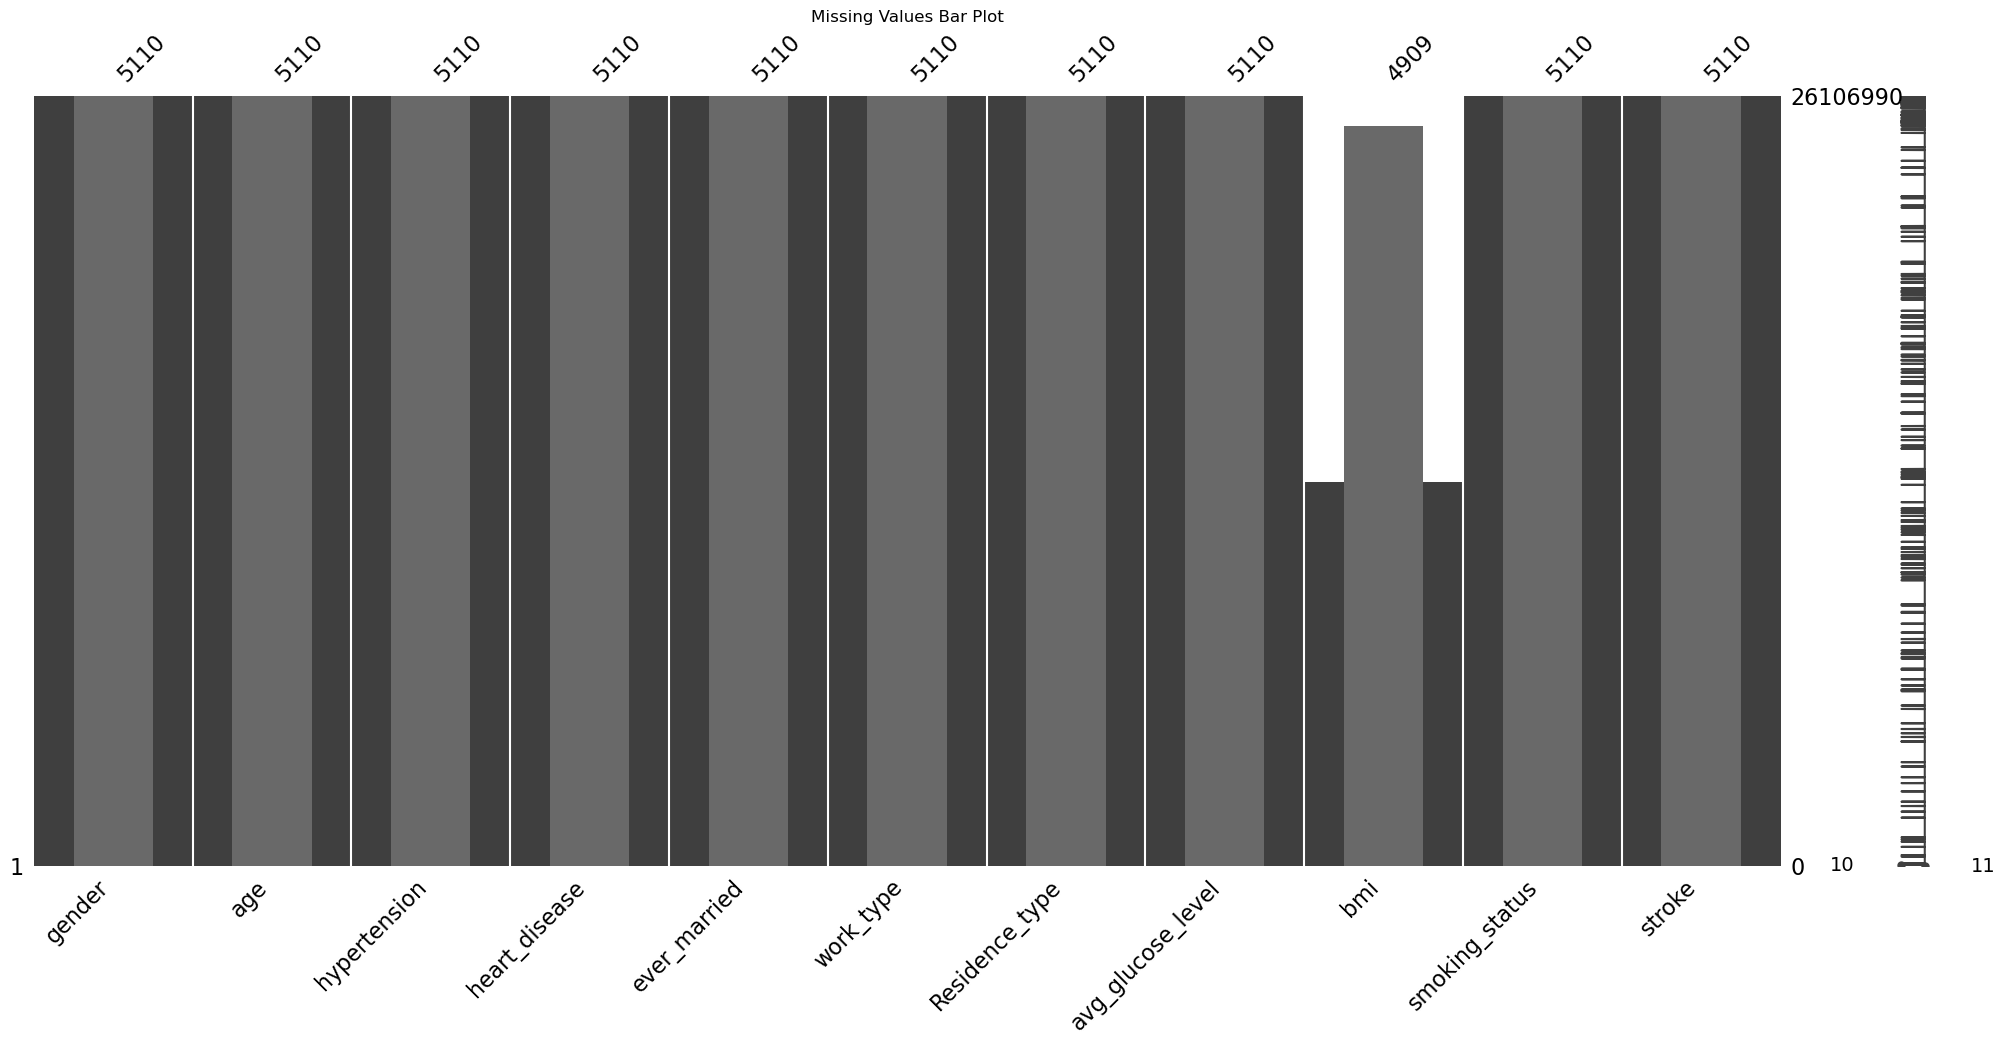

In [10]:
# Matrix plot
import missingno as mno
mno.matrix(dataset)

# Bar plot
mno.bar(dataset)
plt.title('Missing Values Bar Plot')
plt.show()

In [8]:
# Mengisi missing value
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

In [9]:
data = dataset

df = pd.DataFrame(data)

# Inisialisasi imputer dengan RandomForest sebagai estimator
imputer = IterativeImputer(estimator=RandomForestRegressor(n_estimators=100, random_state=42), random_state=42)

# Mengubah kolom 'bmi' menjadi 2D array
df_bmi = df[['bmi']]

# Melakukan imputasi pada kolom 'bmi'
df_imputed = imputer.fit_transform(df_bmi)
df_imputed = pd.DataFrame(df_imputed, columns=['bmi'])

# Menggabungkan kembali kolom yang tidak diproses jika ada
df['bmi'] = df_imputed['bmi']

# Tampilkan DataFrame yang telah diimputasi
print(df)


      gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level        bmi  

In [10]:
dataset = df
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [11]:
# Mengecek missing value
dataset.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [12]:
dataset.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


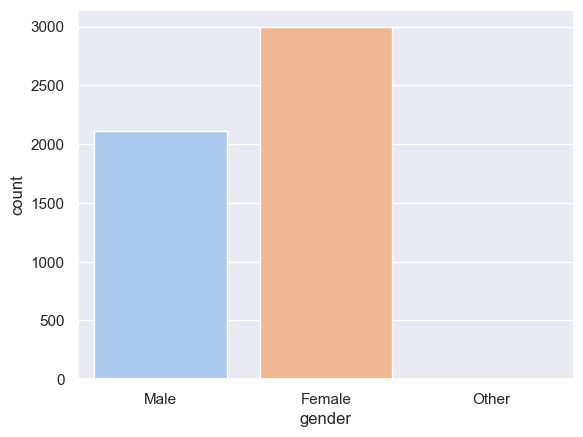

In [13]:
# Distribusi Gender
print(dataset.gender.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="gender", palette="pastel")
plt.show()

heart_disease
0    4834
1     276
Name: count, dtype: int64


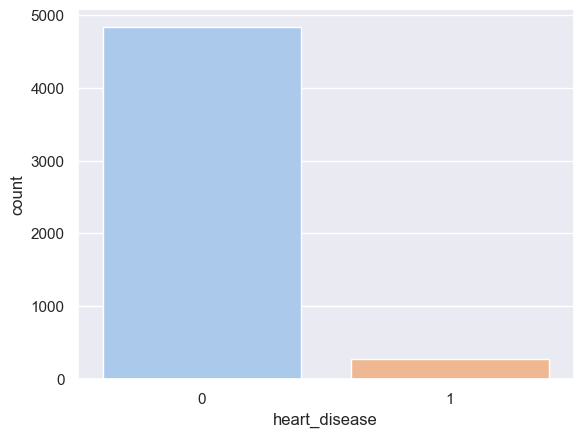

In [14]:
# Distribusi Penyakit Jantung
print(dataset.heart_disease.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="heart_disease", palette="pastel")
plt.show()

hypertension
0    4612
1     498
Name: count, dtype: int64


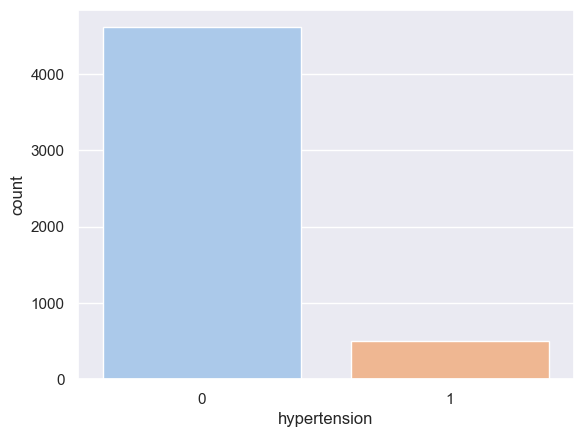

In [15]:
# Distribusi Hipertensi
print(dataset.hypertension.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="hypertension", palette="pastel")
plt.show()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64


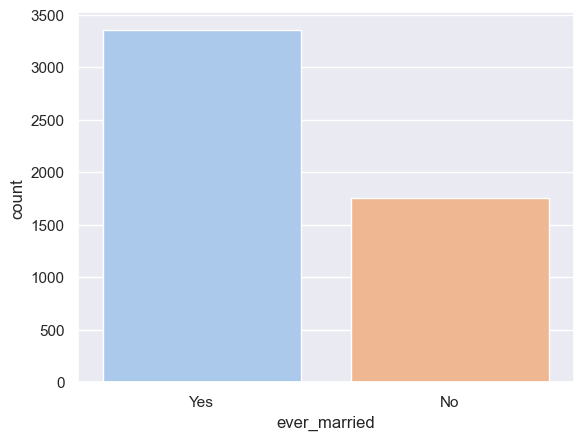

In [16]:
# Distribusi Status Pernikahan
print(dataset.ever_married.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="ever_married", palette="pastel")
plt.show()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64


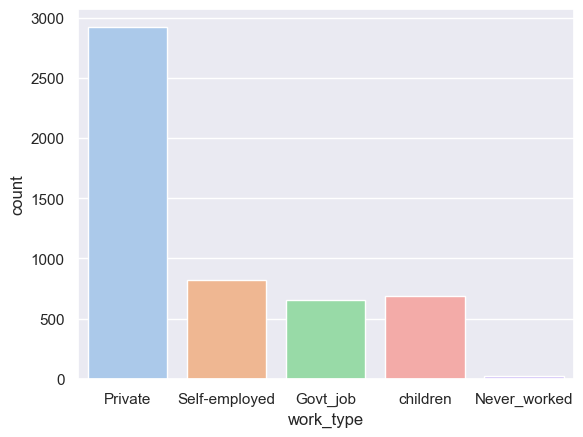

In [17]:
# Distribusi Jenis Pekerjaan
print(dataset.work_type.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="work_type", palette="pastel")
plt.show()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64


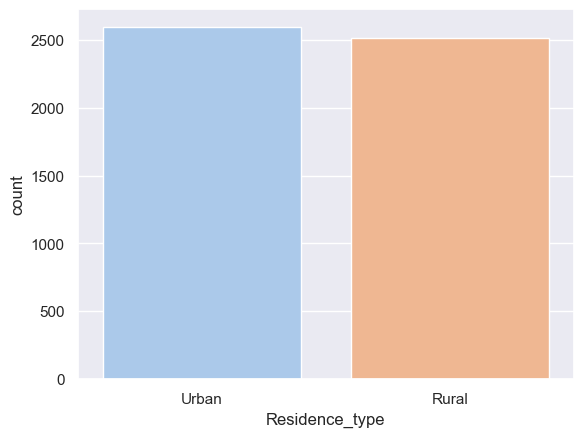

In [18]:
# Distribusi Residen
print(dataset.Residence_type.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="Residence_type", palette="pastel")
plt.show()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


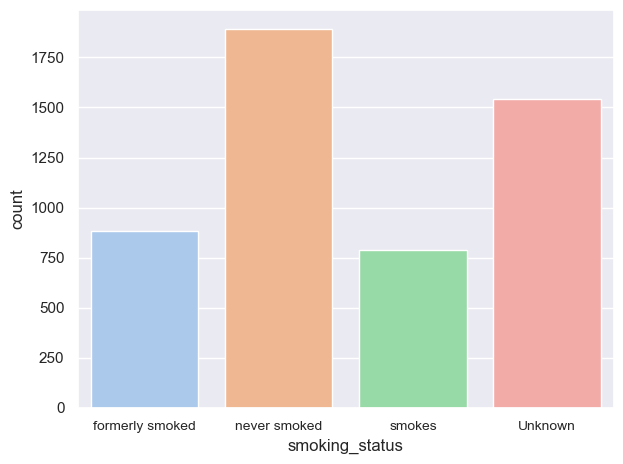

In [19]:
# Distribusi Status Merokok
print(dataset.smoking_status.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="smoking_status", palette="pastel")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
plt.tight_layout()
plt.show()

stroke
0    4861
1     249
Name: count, dtype: int64


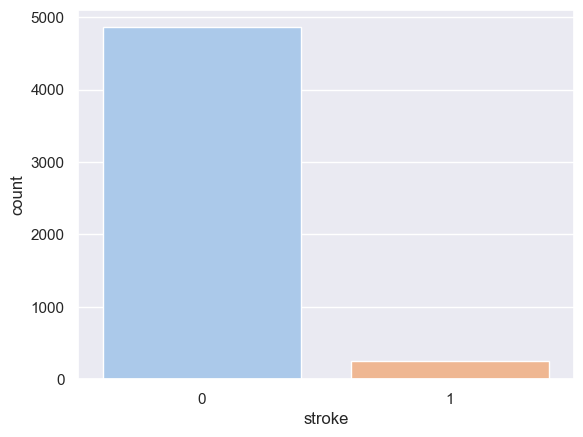

In [20]:
# Distribusi Terkena Stroke
print(dataset.stroke.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="stroke", palette="pastel")
plt.show()

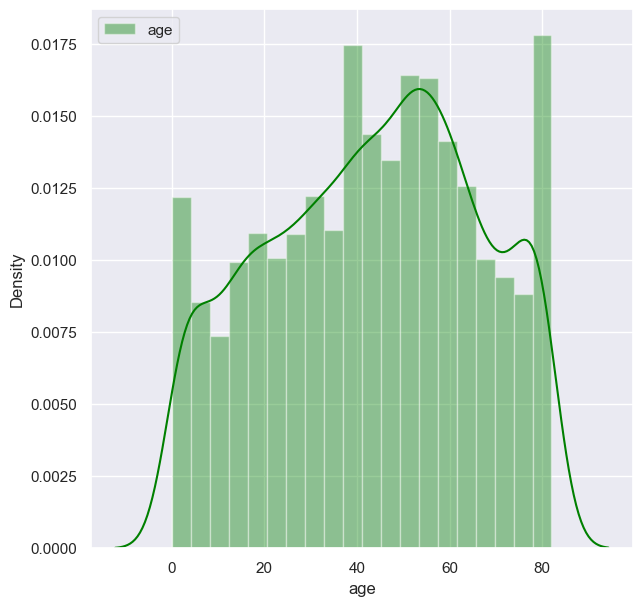

In [21]:
# Distribusi Plot Umur
fig = plt.figure(figsize=(7,7))
sns.distplot(dataset.age, color="green", label="age", kde= True)
plt.legend()

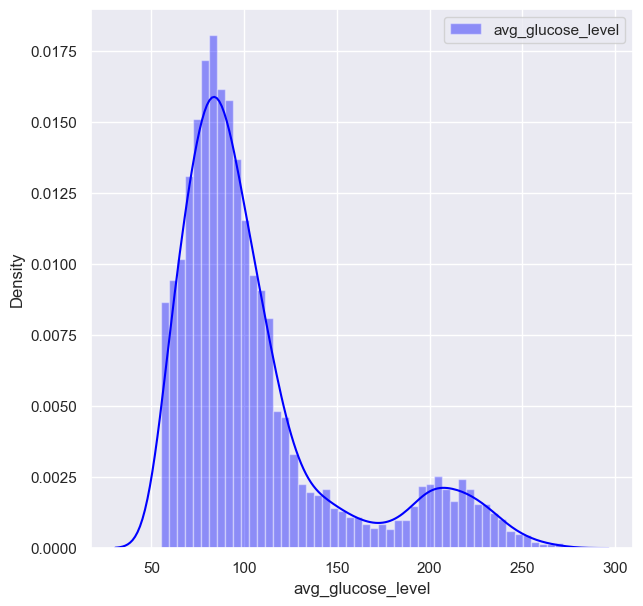

In [22]:
# Distribusi Plot avg_glucose_level
fig = plt.figure(figsize=(7,7))
sns.distplot(dataset.avg_glucose_level, color="blue", label="avg_glucose_level", kde= True)
plt.legend()

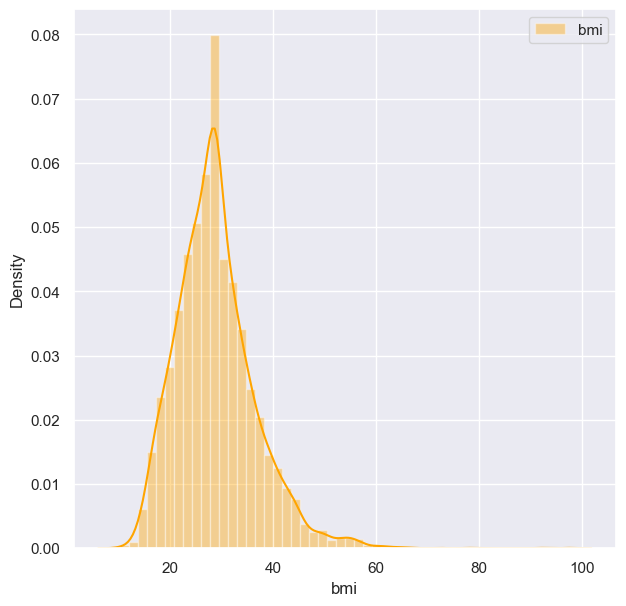

In [23]:
# Distribusi Plot BMI
fig = plt.figure(figsize=(7,7))
sns.distplot(dataset.bmi, color="orange", label="bmi", kde= True)
plt.legend()

**Data pre-processing**

In [24]:
# Memisahkan Y dan x
y = dataset.stroke
x = dataset.drop(['stroke'], axis=1)

In [25]:
x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked
...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked


In [26]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [27]:
# Menggunakan OneHotEncoder() untuk encode kolom kategorikal: 'gender', 'work_type' and 'smoking_status.
from sklearn.preprocessing import OneHotEncoder
# Membuat instance dari OneHotEncoder tanpa menyebutkan 'sparse'
onehot_encoder = OneHotEncoder()

# Melakukan fit dan transformasi pada kolom 'gender', 'work_type', 'smoking_status'
embarked_onehot = onehot_encoder.fit_transform(x[['gender', 'work_type', 'smoking_status']])

# Mengonversi hasilnya menjadi DataFrame
embarked_onehot_df = pd.DataFrame(embarked_onehot.toarray(), columns=onehot_encoder.get_feature_names_out(['gender', 'work_type', 'smoking_status']))

# Menggabungkan DataFrame baru dengan DataFrame asli
x = pd.concat([x.reset_index(drop=True), embarked_onehot_df.reset_index(drop=True)], axis=1)
x.drop(columns=['gender', 'work_type', 'smoking_status'], inplace=True)
x.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,Yes,Urban,228.69,36.600000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,61.0,0,0,Yes,Rural,202.21,28.893237,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,80.0,0,1,Yes,Rural,105.92,32.500000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,49.0,0,0,Yes,Urban,171.23,34.400000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,79.0,1,0,Yes,Rural,174.12,24.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [28]:
# Menggunakan LabelEncoder() untuk kolom biner: 'ever_married' and 'residence_type'
from sklearn.preprocessing import LabelEncoder

# membuat objek label encoder
le = LabelEncoder()

# Encode kolom 'time'
x['ever_married'] = le.fit_transform(df['ever_married'])
x['Residence_type'] = le.fit_transform(df['Residence_type'])

print(x)


       age  hypertension  heart_disease  ever_married  Residence_type  \
0     67.0             0              1             1               1   
1     61.0             0              0             1               0   
2     80.0             0              1             1               0   
3     49.0             0              0             1               1   
4     79.0             1              0             1               0   
...    ...           ...            ...           ...             ...   
5105  80.0             1              0             1               1   
5106  81.0             0              0             1               1   
5107  35.0             0              0             1               0   
5108  51.0             0              0             1               0   
5109  44.0             0              0             1               1   

      avg_glucose_level        bmi  gender_Female  gender_Male  gender_Other  \
0                228.69  36.600000         

In [29]:
print('Shape of X: ', x.shape)
print('Shape of Y: ', y.shape)

Shape of X:  (5110, 19)
Shape of Y:  (5110,)


In [30]:
# Splitting data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)


In [31]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
# SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train.ravel())

In [20]:
# Model selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

In [22]:
models = []
models.append(['Logistic Regreesion', LogisticRegression(random_state=0)])
models.append(['SVM', SVC(random_state=0)])
models.append(['KNeighbors', KNeighborsClassifier()])
models.append(['GaussianNB', GaussianNB()])
models.append(['BernoulliNB', BernoulliNB()])
models.append(['Decision Tree', DecisionTreeClassifier(random_state=0)])
models.append(['Random Forest', RandomForestClassifier(random_state=0)])
models.append(['XGBoost', XGBClassifier(eval_metric= 'error')])

lst_1= []

for m in range(len(models)):
    lst_2= []
    model = models[m][1]
    model.fit(x_train_res, y_train_res)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = x_train_res, y = y_train_res, cv = 10)   #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred)  #F1 Score
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test, y_pred))
    print('')
    print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print('')
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f}'.format(roc))
    print('')
    print('Precision: {:.2f}'.format(precision))
    print('')
    print('Recall: {:.2f}'.format(recall))
    print('')
    print('F1: {:.2f}'.format(f1))
    print('-----------------------------------')
    print('')
    lst_2.append(models[m][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100)
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)


Logistic Regreesion :
[[741 227]
 [ 16  38]]
Accuracy Score:  0.7622309197651663

K-Fold Validation Mean Accuracy: 79.35 %

Standard Deviation: 1.62 %

ROC AUC Score: 0.73

Precision: 0.14

Recall: 0.70

F1: 0.24
-----------------------------------

SVM :
[[805 163]
 [ 33  21]]
Accuracy Score:  0.8082191780821918

K-Fold Validation Mean Accuracy: 88.39 %

Standard Deviation: 1.79 %

ROC AUC Score: 0.61

Precision: 0.11

Recall: 0.39

F1: 0.18
-----------------------------------

KNeighbors :
[[831 137]
 [ 36  18]]
Accuracy Score:  0.8307240704500979

K-Fold Validation Mean Accuracy: 91.10 %

Standard Deviation: 1.01 %

ROC AUC Score: 0.60

Precision: 0.12

Recall: 0.33

F1: 0.17
-----------------------------------

GaussianNB :
[[145 823]
 [  2  52]]
Accuracy Score:  0.19275929549902152

K-Fold Validation Mean Accuracy: 57.33 %

Standard Deviation: 0.86 %

ROC AUC Score: 0.56

Precision: 0.06

Recall: 0.96

F1: 0.11
-----------------------------------

BernoulliNB :
[[570 398]
 [  9  4

In [23]:
df = pd.DataFrame(lst_1, columns= ['Model', 'Accuracy', 'K-Fold Mean Accuracy', 'Std. Deviation', 'ROC AUC', 'Precision', 'Recall', 'F1'])

In [24]:
df.sort_values(by= ['Accuracy', 'K-Fold Mean Accuracy'], inplace= True, ascending= False)

In [43]:
df

,Model,Accuracy,K-Fold Mean Accuracy,Std. Deviation,ROC AUC,Precision,Recall,F1
7,XGBoost,91.780822,95.068739,4.274934,0.536961,0.142857,0.111111,0.125000
6,Random Forest,90.704501,95.723193,1.649890,0.531279,0.113208,0.111111,0.112150
5,Decision Tree,85.518591,90.508661,2.737730,0.538874,0.087719,0.185185,0.119048
2,KNeighbors,83.072407,91.099442,1.013976,0.595902,0.116129,0.333333,0.172249
1,SVM,80.821918,88.389538,1.789774,0.610250,0.114130,0.388889,0.176471
0,Logistic Regreesion,76.223092,79.347526,1.618546,0.734600,0.143396,0.703704,0.238245
4,BernoulliNB,60.176125,73.143936,1.368484,0.711088,0.101580,0.833333,0.181087
3,GaussianNB,19.275930,57.333590,0.861249,0.556378,0.059429,0.962963,0.111948


In [25]:
# Tuning Model
from sklearn.model_selection import GridSearchCV

In [26]:
grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[0]}]),
               (KNeighborsClassifier(),[{'n_neighbors':[5,7,8,10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]),
               (SVC(),[{'C':[0.25,0.5,0.75,1],'kernel':['linear', 'rbf'],'random_state':[0]}]),
               (GaussianNB(),[{'var_smoothing': [1e-09]}]),
               (BernoulliNB(), [{'alpha': [0.25, 0.5, 1]}]),
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]),
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}]),
              (XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']}])]

In [27]:
for i, j in grid_models:
    grid = GridSearchCV(estimator=i, param_grid=j, scoring='accuracy', cv=10)
    grid.fit(x_train_res, y_train_res)
    best_model = grid.best_estimator_
    best_model.fit(x_train_res, y_train_res)
    y_pred = best_model.predict(x_test)
    
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    roc = roc_auc_score(y_test, y_pred)  # ROC AUC Score
    precision = precision_score(y_test, y_pred)  # Precision Score
    recall = recall_score(y_test, y_pred)  # Recall Score
    f1 = f1_score(y_test, y_pred)  # F1 Score

    print('{}:\nBest Accuracy : {:.2f}%'.format(best_model, best_accuracy * 100))
    print('Best Parameters : ', best_param)
    print('Accuracy Score: ', accuracy_score(y_test, y_pred))
    print('')
    print("K-Fold Validation Mean Accuracy: {:.2f} %".format(cross_val_score(best_model, x_train_res, y_train_res, cv=10).mean() * 100))
    print('')
    print("Standard Deviation: {:.2f} %".format(cross_val_score(best_model, x_train_res, y_train_res, cv=10).std() * 100))
    print('')
    print('ROC AUC Score: {:.2f}'.format(roc))
    print('')
    print('Precision: {:.2f}'.format(precision))
    print('')
    print('Recall: {:.2f}'.format(recall))
    print('')
    print('F1: {:.2f}'.format(f1))
    print('')
    print('----------------')
    print('')

LogisticRegression(C=0.5, random_state=0):
Best Accuracy : 79.37%
Best Parameters :  {'C': 0.5, 'random_state': 0}
Accuracy Score:  0.7622309197651663

K-Fold Validation Mean Accuracy: 79.37 %

Standard Deviation: 1.58 %

ROC AUC Score: 0.73

Precision: 0.14

Recall: 0.70

F1: 0.24

----------------

KNeighborsClassifier(metric='manhattan'):
Best Accuracy : 92.26%
Best Parameters :  {'metric': 'manhattan', 'n_neighbors': 5}
Accuracy Score:  0.8483365949119374

K-Fold Validation Mean Accuracy: 92.26 %

Standard Deviation: 1.15 %

ROC AUC Score: 0.57

Precision: 0.11

Recall: 0.26

F1: 0.15

----------------

SVC(C=1, random_state=0):
Best Accuracy : 88.39%
Best Parameters :  {'C': 1, 'kernel': 'rbf', 'random_state': 0}
Accuracy Score:  0.8082191780821918

K-Fold Validation Mean Accuracy: 88.39 %

Standard Deviation: 1.79 %

ROC AUC Score: 0.61

Precision: 0.11

Recall: 0.39

F1: 0.18

----------------

GaussianNB():
Best Accuracy : 57.33%
Best Parameters :  {'var_smoothing': 1e-09}
Accu

Random Forest (setelah Tuning)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       968
           1       0.10      0.09      0.10        54

    accuracy                           0.91      1022
   macro avg       0.52      0.52      0.52      1022
weighted avg       0.90      0.91      0.91      1022

ROC AUC score: 0.741027701254974
Accuracy Score:  0.9080234833659491


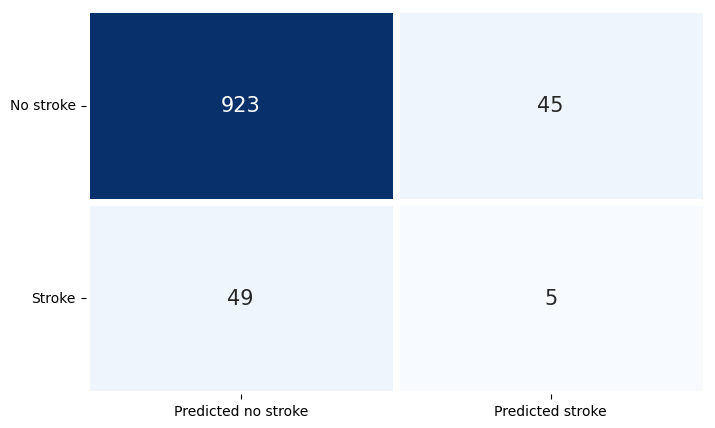

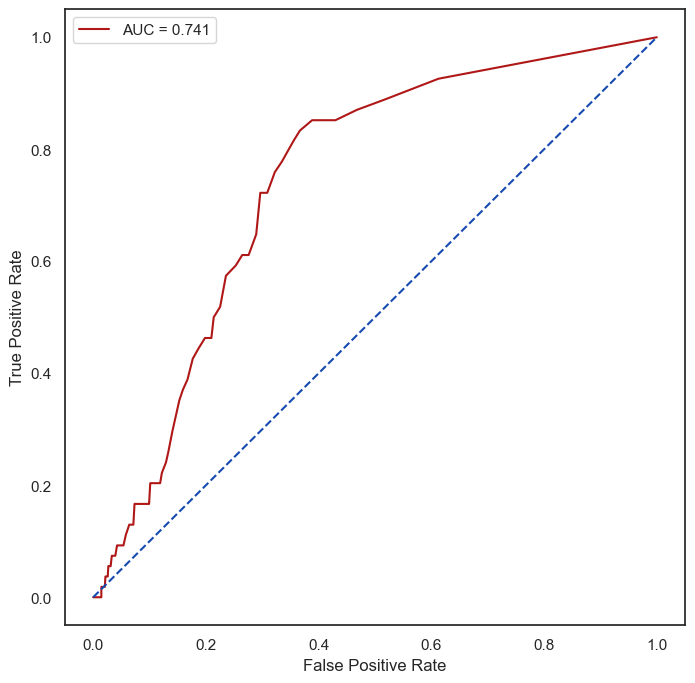

In [28]:
# Model setelah hyperparameter tuning (dipilih 2 model yang mempunyai akurasi tertinggi, yaitu random forest dan xgboost)
# Fitting RandomForest Model
classifier = RandomForestClassifier(criterion= 'entropy', n_estimators= 100, random_state= 0)
classifier.fit(x_train_res, y_train_res)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

XBGClassifier (setelah tuning)

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       968
           1       0.07      0.11      0.08        54

    accuracy                           0.87      1022
   macro avg       0.51      0.51      0.51      1022
weighted avg       0.90      0.87      0.89      1022

ROC AUC score: 0.7366850321395776
Accuracy Score:  0.8718199608610567


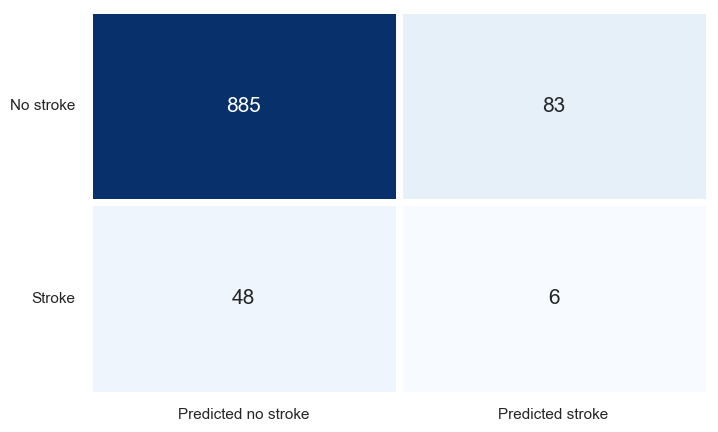

Text(0.5, 0, 'False Positive Rate')

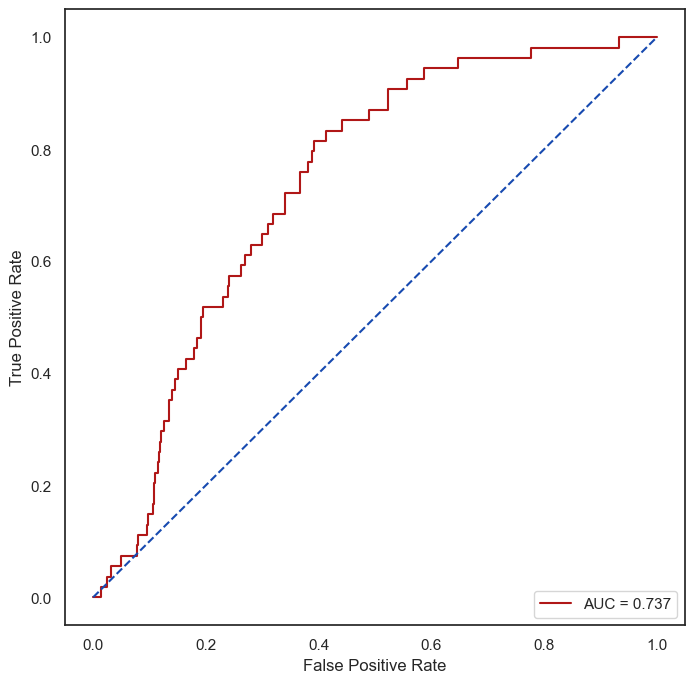

In [43]:
#Fitting XGBClassifier Model
classifier = XGBClassifier(eval_metric= 'error', learning_rate= 0.1)
classifier.fit(x_train_res, y_train_res)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

**ANN**

In [44]:
# %pip install scikeras

In [88]:
import tensorflow as tf
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.regularizers import l2

In [89]:
# Building the function (testing)
def ann_classifier():
    ann = tf.keras.models.Sequential()
    ann.add(tf.keras.layers.Dense(units=8, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu', input_shape=(x_train_res.shape[1],)))
    ann.add(tf.keras.layers.Dense(units=8, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
    ann.add(tf.keras.layers.Dropout(0.6))  # Add the Dropout layer correctly
    ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return ann

In [90]:
# Passing values to KerasClassifier
ann = KerasClassifier(model=ann_classifier, batch_size=32, epochs=50)

# We are using 5 fold cross-validation here
accuracies = cross_val_score(estimator=ann, X=x_train_res, y=y_train_res, cv=5)

print(f"Mean accuracy: {accuracies.mean()}")
print(f"Standard deviation of accuracy: {accuracies.std()}")

Epoch 1/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5050 - loss: 0.8792
Epoch 2/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5528 - loss: 0.7716
Epoch 3/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5910 - loss: 0.7122
Epoch 4/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6649 - loss: 0.6422
Epoch 5/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6992 - loss: 0.5990
Epoch 6/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7250 - loss: 0.5683
Epoch 7/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7593 - loss: 0.5410
Epoch 8/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7665 - loss: 0.5243
Epoch 9/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7730 - loss: 0.5179
Epoch 10/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7637 - loss: 0.5140
Epoch 11/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7607 - loss: 0.5258
Epoch 12/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [91]:
from keras.models import Sequential
from keras.layers import Dense

# Define the model
model = Sequential()

# Add layers
model.add(Dense(32, input_shape=(784,), activation='relu'))
model.add(Dense(10, activation='softmax'))

# Access model outputs correctly after defining the model
print(model.outputs)  # This should now work correctly

[<KerasTensor shape=(None, 10), dtype=float32, sparse=False, name=keras_tensor_196>]


In [92]:
# Checking the mean and standard deviation of the accuracies obtained
mean = accuracies.mean()
std_deviation = accuracies.std()
print("Accuracy: {:.2f} %".format(mean*100))
print("Standard Deviation: {:.2f} %".format(std_deviation*100))

Accuracy: 84.77 %
Standard Deviation: 1.10 %


In [93]:
# Tuning the ANN

# Building the function (testing)
def ann_classifier(optimizer='adam'):
    ann = tf.keras.models.Sequential()
    ann.add(tf.keras.layers.Dense(units=8, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu', input_shape=(x_train_res.shape[1],)))
    ann.add(tf.keras.layers.Dense(units=8, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
    ann.add(tf.keras.layers.Dropout(0.6))  # Add the Dropout layer correctly
    ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    ann.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return ann

In [94]:
# Passing values to KerasClassifier
ann = KerasClassifier(model=ann_classifier, batch_size=32, epochs=50)

# Using 5-fold cross-validation
accuracies = cross_val_score(estimator=ann, X=x_train_res, y=y_train_res, cv=5)

# Print the mean and standard deviation of the accuracies obtained
mean = accuracies.mean()
std_deviation = accuracies.std()
print("Accuracy: {:.2f} %".format(mean * 100))
print("Standard Deviation: {:.2f} %".format(std_deviation * 100))

# Tuning the ANN using GridSearchCV
parameters = {'batch_size': [25, 32],
              'epochs': [50, 100, 150],
              'optimizer': ['adam', 'rmsprop']}

grid_search = GridSearchCV(estimator=ann, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1)

grid_search.fit(x_train_res, y_train_res)

# Print the best score and parameters
print(f"Best score: {grid_search.best_score_}")
print(f"Best parameters: {grid_search.best_params_}")

# Define a simple model to print the outputs
from keras.models import Sequential
from keras.layers import Dense

# Define the model
model = Sequential()

# Add layers
model.add(Dense(32, input_shape=(784,), activation='relu'))
model.add(Dense(10, activation='softmax'))

# Access model outputs correctly after defining the model
print(model.outputs)

Epoch 1/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5207 - loss: 0.9505
Epoch 2/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5947 - loss: 0.7881
Epoch 3/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6565 - loss: 0.7092
Epoch 4/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7151 - loss: 0.6512
Epoch 5/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7281 - loss: 0.6210
Epoch 6/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7384 - loss: 0.6023
Epoch 7/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7675 - loss: 0.5761
Epoch 8/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7556 - loss: 0.5820
Epoch 9/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7758 - loss: 0.5537
Epoch 10/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7611 - loss: 0.5667
Epoch 11/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7735 - loss: 0.5447
Epoch 12/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [95]:
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [96]:
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 85.54 %
Best Parameters: {'batch_size': 32, 'epochs': 150, 'optimizer': 'rmsprop'}


In [97]:
# ANN model after tuning
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units= 32, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
ann.add(tf.keras.layers.Dense(units= 32, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
ann.add(tf.keras.layers.Dropout(0.6))
ann.add(tf.keras.layers.Dense(units= 1, activation='sigmoid'))
ann.compile(optimizer= 'rmsprop', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [98]:
ann_history = ann.fit(x_train_res, y_train_res, batch_size= 32, epochs= 150, validation_split= 0.2)

Epoch 1/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6341 - loss: 1.0717 - val_accuracy: 0.5725 - val_loss: 0.9420
Epoch 2/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7533 - loss: 0.7001 - val_accuracy: 0.7060 - val_loss: 0.8058
Epoch 3/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7823 - loss: 0.5739 - val_accuracy: 0.8248 - val_loss: 0.6377
Epoch 4/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7989 - loss: 0.5167 - val_accuracy: 0.8042 - val_loss: 0.6306
Epoch 5/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7969 - loss: 0.4934 - val_accuracy: 0.8087 - val_loss: 0.6179
Epoch 6/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8146 - loss: 0.4658 - val_accuracy: 0.8100 - val_loss: 0.5965
Epoch 7/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8141 - loss: 0.4679 - val_accuracy: 0.7824 - val_loss: 0.6232
Epoch 8/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8140 - loss: 0.4575 - val_accu

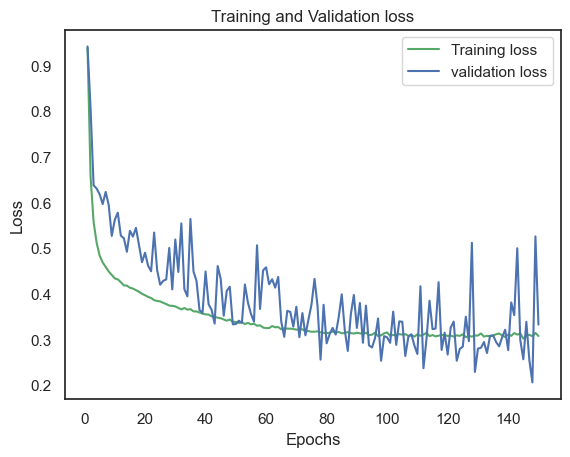

In [99]:
# Loss Graph
loss_train = ann_history.history['loss']
loss_val = ann_history.history['val_loss']
epochs = range(1,151)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

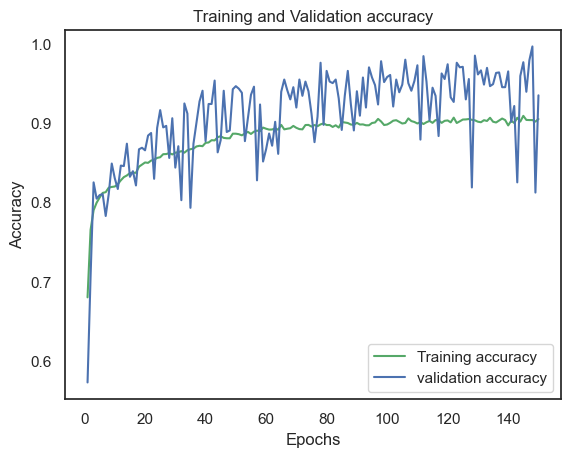

In [100]:
# Accuracy Graph
loss_train = ann_history.history['accuracy']
loss_val = ann_history.history['val_accuracy']
epochs = range(1,151)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       968
           1       0.12      0.24      0.16        54

    accuracy                           0.86      1022
   macro avg       0.54      0.57      0.54      1022
weighted avg       0.91      0.86      0.89      1022

Confusion Matrix:
[[871  97]
 [ 41  13]]


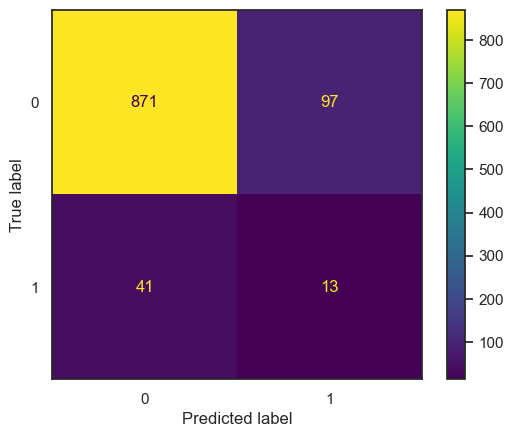

Accuracy: 86.50%
ROC-AUC: 0.71


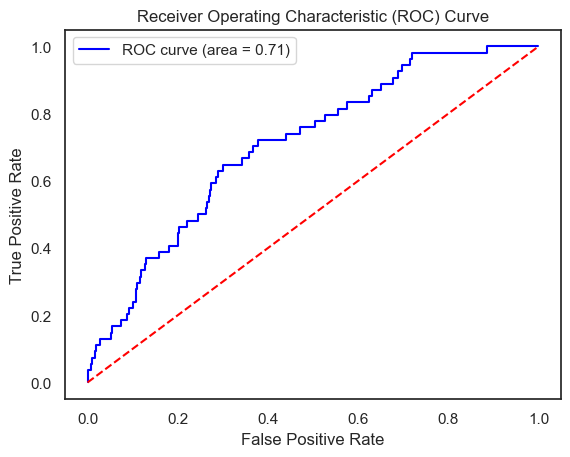

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_auc_score, roc_curve

# Predict on the test data
y_pred_prob = ann.predict(x_test)  # Probabilitas output
# Convert probabilities to binary classes
y_pred_classes = (y_pred_prob > 0.5).astype("int32")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(cm)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Compute ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC: {roc_auc:.2f}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()